In [1]:
# Dependencies
import numpy as np
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler("075298od64xavRURiavUCuVhJ", "upK6S0EsbZREpods3xFUPk9meGQQMnvBAbPvX2GQ2mIZ0zFy91")
auth.set_access_token("999292059709255680-uHOQmfMO8szs1f0oPQktxgJStRUGhsn"
, "ODtkaPhorztXKlyRHSsCA4TxKrb7uPhMW2e6HlqpruhqF")
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [16]:
# target key terms
key_terms = ["Baker Hughes","OPEC"]
# create sentiments arrays
sentiment_array = []
sentiment_array_avg = []


In [17]:
# gather the tweets and run vader on them
for key_term in key_terms:
    # create counter
    counter = 1

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []
    
    #loop through 5 pages of tweets (100 tweets)
    for x in range(5):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(key_term, page = x)
            #Pull Data
   ## public_tweets = api.search(search_term, 
                               #count=100, 
                               #result_type="recent",
                              #since = start_dates[n-1],
                               #until = end_dates[n-1])
        
        # loop through the tweets
        for tweet in public_tweets:
            # get tweet text
            text = tweet["text"]
            
            # Running Vader Analysis on each tweet
            compound = analyzer.polarity_scores(text)["compound"]
            pos = analyzer.polarity_scores(text)["pos"]
            neu = analyzer.polarity_scores(text)["neu"]
            neg = analyzer.polarity_scores(text)["neg"]

            # Adding each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago.append(counter)
            counter += 1
    # Storing the Average Sentiments
    sentiments =  {"key_term": key_term,
                  "Compound Score": compound_list,
                  "Positive Score": positive_list,
                  "Negative Score": negative_list,
                  "Neutral Score": neutral_list,
                  "Tweets Ago": tweets_ago}
    
    sentiment_array_avg.append({"key_term": key_term,
                  "Compound Score": np.average(compound_list),
                  "Positive Score": np.average(positive_list),
                  "Negative Score": np.average(negative_list),
                  "Neutral Score": np.average(neutral_list)})
    
    sentiment_array.append(sentiments)

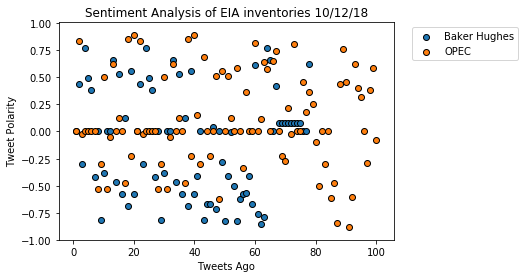

In [18]:
Sentiment_dataframes = []
for item in sentiment_array:
    [int(x) for x in item["Tweets Ago"]]
    Sentiment_dataframe = pd.DataFrame(item)
    Sentiment_dataframes.append(Sentiment_dataframe)
    plt.scatter(item["Tweets Ago"], item["Compound Score"], label = item["key_term"], edgecolors = "black")
    
# exporting results
result = pd.concat(Sentiment_dataframes)
#result.to_csv("Oil_Sentiments.csv")

# creating the titles, legends, and axis
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of EIA inventories %s" % time.strftime("%x"))


# save figure
#plt.savefig("Sentiment Analysis.png")

plt.show()

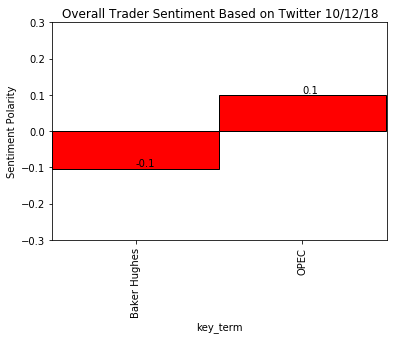

In [19]:
# creating the dataframe
avg_df = pd.DataFrame.from_dict(sentiment_array_avg)

# creating x_axis
x_axis = range(len(avg_df["key_term"]))

# creating the bar plot for the graph
sent_ch = avg_df.plot(kind='bar', x = "key_term", y = "Compound Score", stacked=True, edgecolor = "black",
                              linewidth = 1, width=1, color = "red", legend = None)

# adding labels and setting the xlim
plt.ylabel("Sentiment Polarity")
plt.title("Overall Trader Sentiment Based on Twitter %s" % time.strftime("%x"))
plt.xlim(-.5, len(x_axis)-.49)
plt.ylim(-.3, .3)

# adding data labels
y = round(avg_df["Compound Score"], 2)
x = range(0,len(avg_df["key_term"]))

for a,b in zip(x, y):
    plt.text(a, b + .004, str(b))

# save the figure and show the plot
#plt.savefig("Baker Hughes Sentiment.png")
plt.show()